In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
sns.set(style="whitegrid")

In [4]:
# Set random seed for reproducibility
np.random.seed(42)

%pip install openpyxl
import openpyxl
file_path = './Coffe_sales.xlsx'
df = pd.read_excel(file_path)

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)

   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------

In [5]:
df.head()

,date,datetime,hour_of_day,cash_type,card,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort
0,2024-03-01,2024-03-01 10:15:50.520,10,card,ANON-0000-0000-0001,38.7,Latte,Morning,Fri,Mar,5,3
1,2024-03-01,2024-03-01 12:19:22.539,12,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3
2,2024-03-01,2024-03-01 12:20:18.089,12,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3
3,2024-03-01,2024-03-01 13:46:33.006,13,card,ANON-0000-0000-0003,28.9,Americano,Afternoon,Fri,Mar,5,3
4,2024-03-01,2024-03-01 13:48:14.626,13,card,ANON-0000-0000-0004,38.7,Latte,Afternoon,Fri,Mar,5,3


In [6]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

In [21]:
df['card'].fillna('Unknown', inplace=True)

In [ ]:
df['card'].value_counts()

card
ANON-0000-0000-0012    129
ANON-0000-0000-0141    108
Unknown                 89
ANON-0000-0000-1163     77
ANON-0000-0000-0276     69
                      ... 
ANON-0000-0000-1300      1
ANON-0000-0000-1299      1
ANON-0000-0000-1296      1
ANON-0000-0000-0015      1
ANON-0000-0000-0014      1
Name: count, Length: 1317, dtype: int64

In [ ]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']

['cash_type', 'card', 'coffee_name', 'Time_of_Day', 'Weekday', 'Month_name']

In [35]:
for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3636 non-null   datetime64[ns]
 1   datetime     3636 non-null   datetime64[ns]
 2   hour_of_day  3636 non-null   int64         
 3   cash_type    3636 non-null   object        
 4   card         3636 non-null   object        
 5   money        3636 non-null   float64       
 6   coffee_name  3636 non-null   object        
 7   Time_of_Day  3636 non-null   object        
 8   Weekday      3636 non-null   object        
 9   Month_name   3636 non-null   object        
 10  Weekdaysort  3636 non-null   int64         
 11  Monthsort    3636 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 341.0+ KB


Text(0, 0.5, 'Frequency')

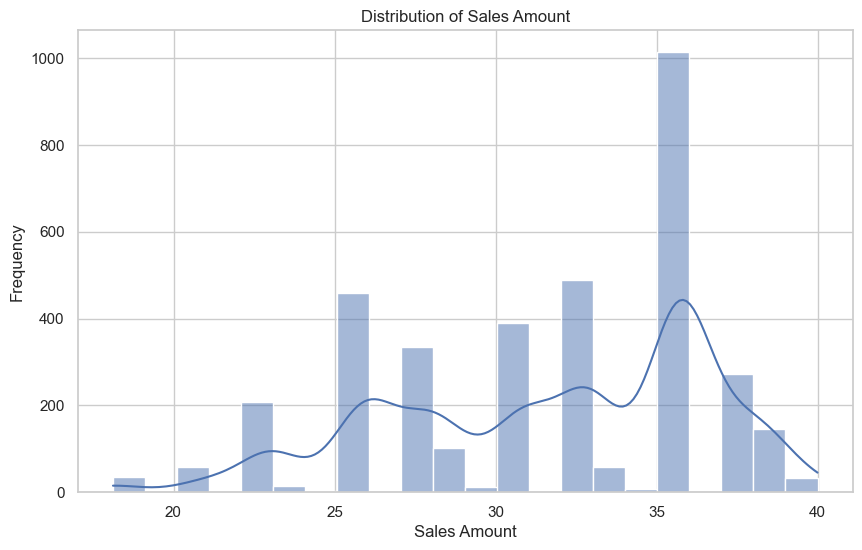

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(df['money'], kde=True)
plt.title("Distribution of Sales Amount")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'americano with milk'),
  Text(1, 0, 'latte'),
  Text(2, 0, 'americano'),
  Text(3, 0, 'cappuccino'),
  Text(4, 0, 'cortado'),
  Text(5, 0, 'hot chocolate'),
  Text(6, 0, 'cocoa'),
  Text(7, 0, 'espresso')])

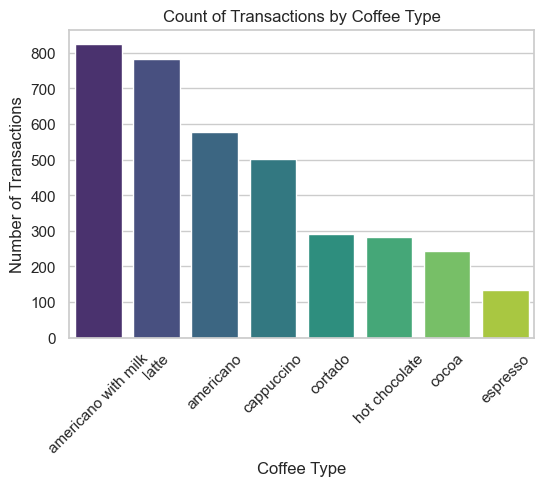

In [52]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='coffee_name', order=df['coffee_name'].value_counts().index, palette='viridis')
plt.title("Count of Transactions by Coffee Type")
plt.xlabel("Coffee Type")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)

In [53]:
numeric_df = df.select_dtypes(include=[np.number])

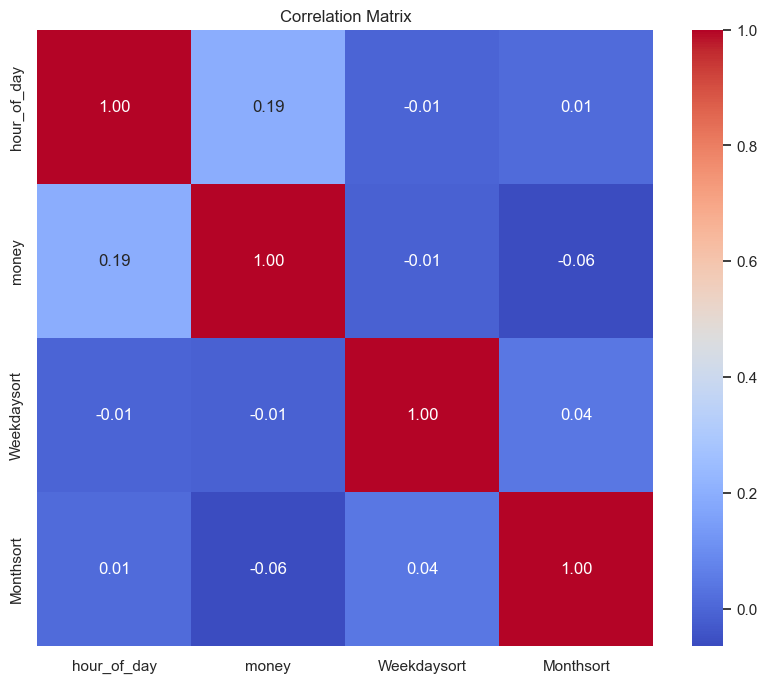

In [54]:
if numeric_df.shape[1] > 1:
    corr_matrix = numeric_df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title("Correlation Matrix")
    plt.show()

Text(0, 0.5, 'Sales Amount')

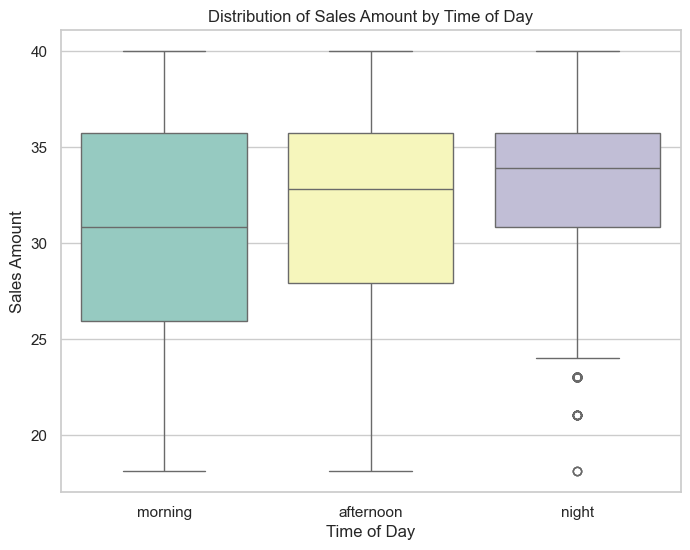

In [57]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Time_of_Day', y='money', data=df, palette='Set3')
plt.title("Distribution of Sales Amount by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Sales Amount")

Text(0, 0.5, 'Sales Amount')

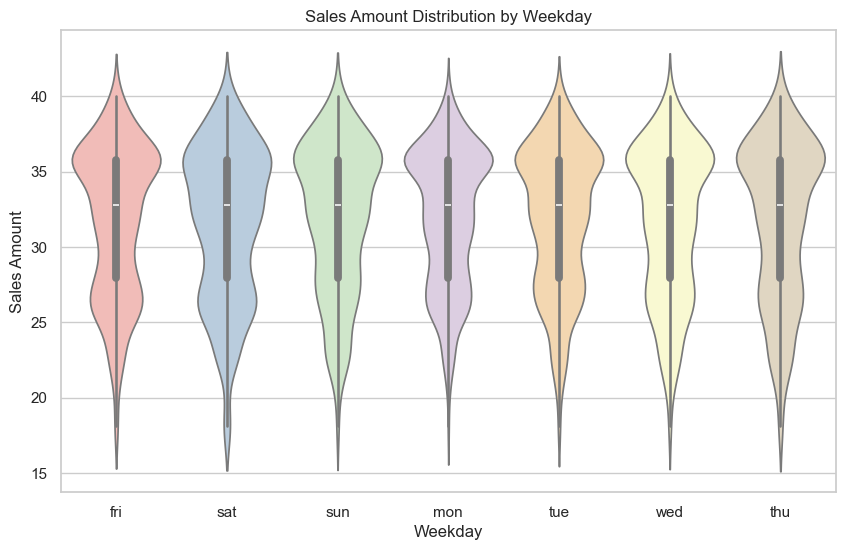

In [58]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Weekday', y='money', data=df, palette='Pastel1')
plt.title("Sales Amount Distribution by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Sales Amount")